In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels
from scipy import stats
import math
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
import warnings
warnings.filterwarnings("ignore")

EDA

In [2]:
eda_data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
eda_data

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [3]:
crime_data = eda_data.groupby(['Occurrence_Category'],as_index=False).size()
crime_data.rename(columns = {'size':'count'},inplace = True)
crime_data

,Occurrence_Category,count
0,Assault,7726
1,Assault & Other crimes against persons,7235
2,Break & Enter,916
3,Break and Enter,868
4,Crimes against Children,69
5,Drug Related,2751
6,"FTA/FTC, Compliance Check & Parollee",3877
7,FTA/FTC/Compliance Check/Parollee,4246
8,Fraud,474
9,Harassment & Threatening,1268


In [5]:
null_data = eda_data.isnull().sum()
notnull_data = eda_data.notnull().sum()
null = pd.DataFrame({'attribute':null_data.index, 'null':null_data.values})
notnull = pd.DataFrame({'attribute':notnull_data.index, 'notnull':notnull_data.values})
df = pd.merge(null, notnull, on = ['attribute'])
df

,attribute,null,notnull
0,Arrest_Year,0,65276
1,Arrest_Month,0,65276
2,EventID,0,65276
3,ArrestID,469,64807
4,PersonID,0,65276
5,Perceived_Race,4,65272
6,Sex,0,65276
7,Age_group__at_arrest_,24,65252
8,Youth_at_arrest__under_18_years,0,65276
9,ArrestLocDiv,0,65276


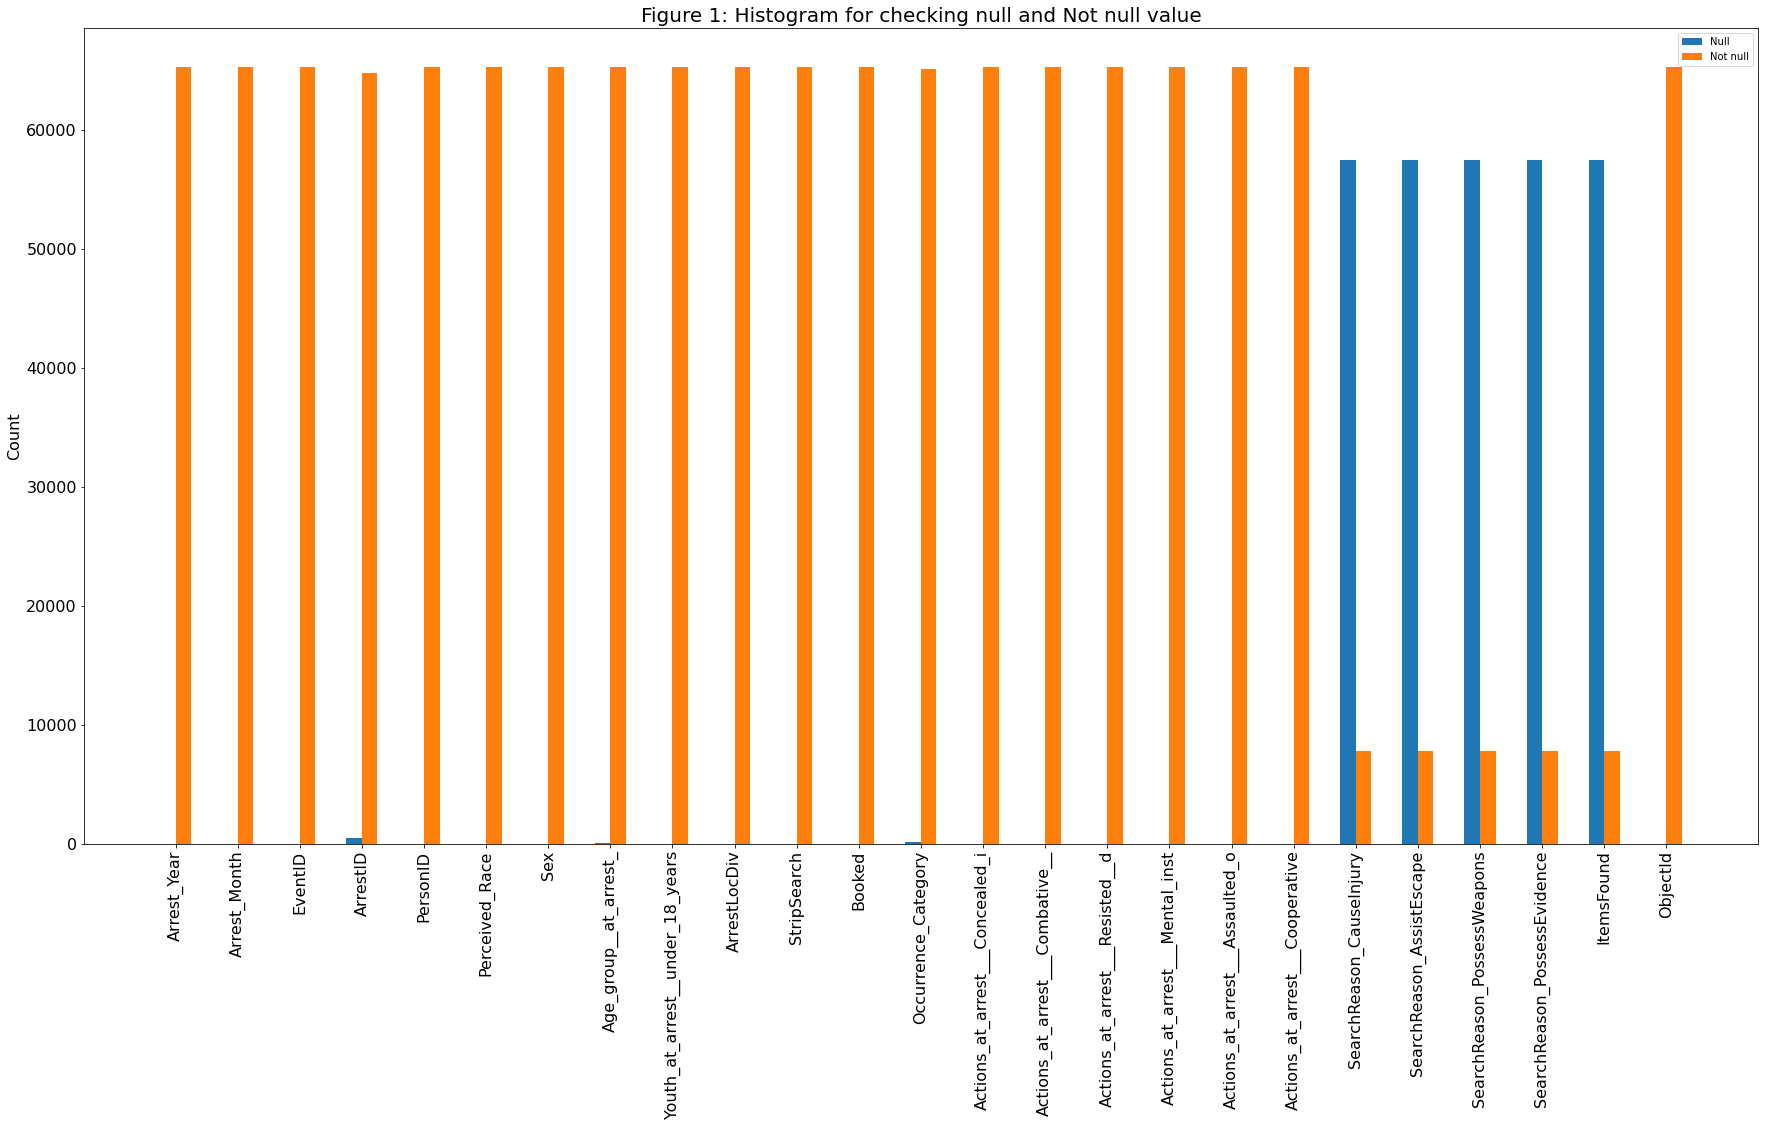

In [41]:
fig = plt.figure(figsize = (30,15))
label1 = df['attribute']
x = np.arange(len(label1))
width = 0.25 
plt.bar(x - width/2, df['null'], width, label='Null')
plt.bar(x + width/2, df['notnull'], width, label='Not null')
plt.legend()
plt.ylabel('Count',size=16)
plt.title('Figure 1: Histogram for checking null and Not null value',size=20)
plt.yticks(size=16)
plt.xticks(x, labels=label1, rotation=90, size=16)
plt.show()

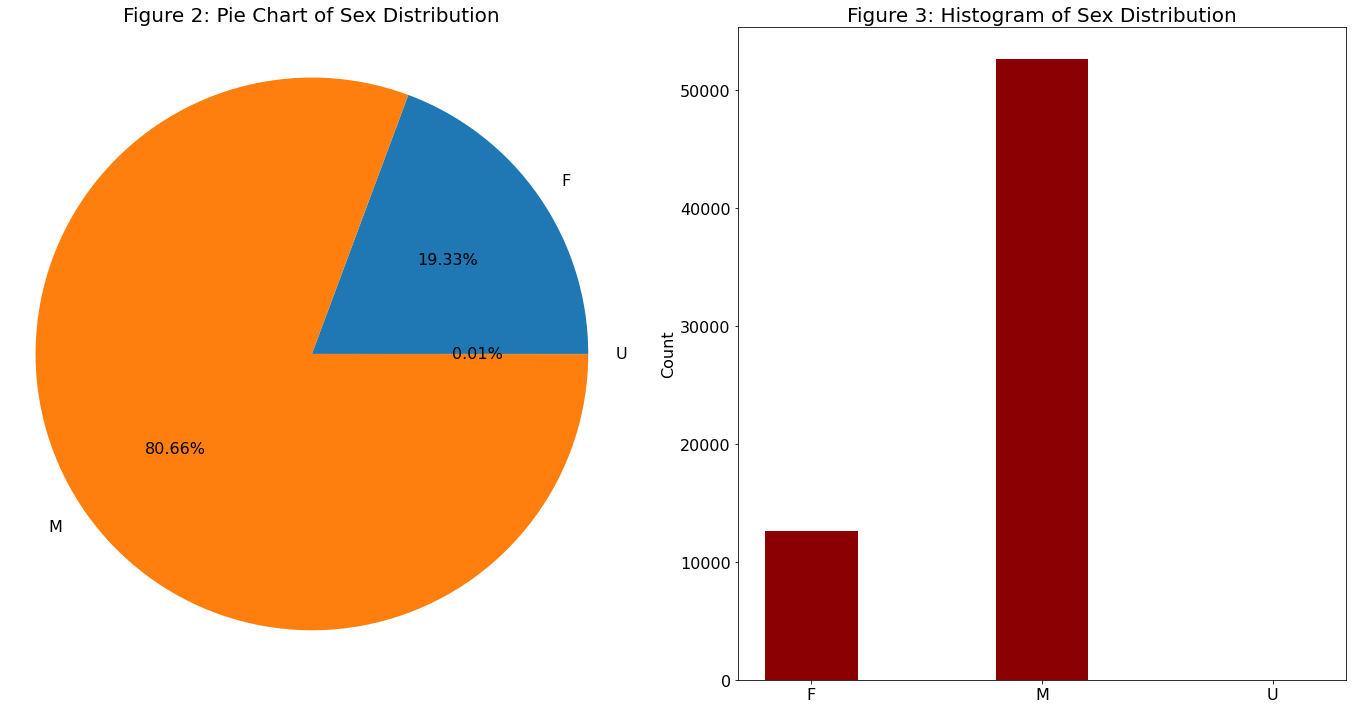

In [8]:
sex_data = eda_data.groupby(['Sex'],as_index=False).size()
sex_data.rename(columns = {'size':'count'},inplace = True)
fig = plt.figure(figsize = (24,12))
plt.subplot(1, 2, 1)
plt.title("Figure 2: Pie Chart of Sex Distribution",size=20)
plt.pie(sex_data['count'],labels=sex_data['Sex'],radius=80,autopct='%1.2f%%',textprops={'fontsize':16,'color':'k'})
plt.axis('equal')
plt.subplot(1, 2, 2)
plt.bar(sex_data['Sex'], height = sex_data['count'],color ='darkred',width = 0.4)
plt.ylabel("Count",size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title("Figure 3: Histogram of Sex Distribution",size=20)
plt.show()

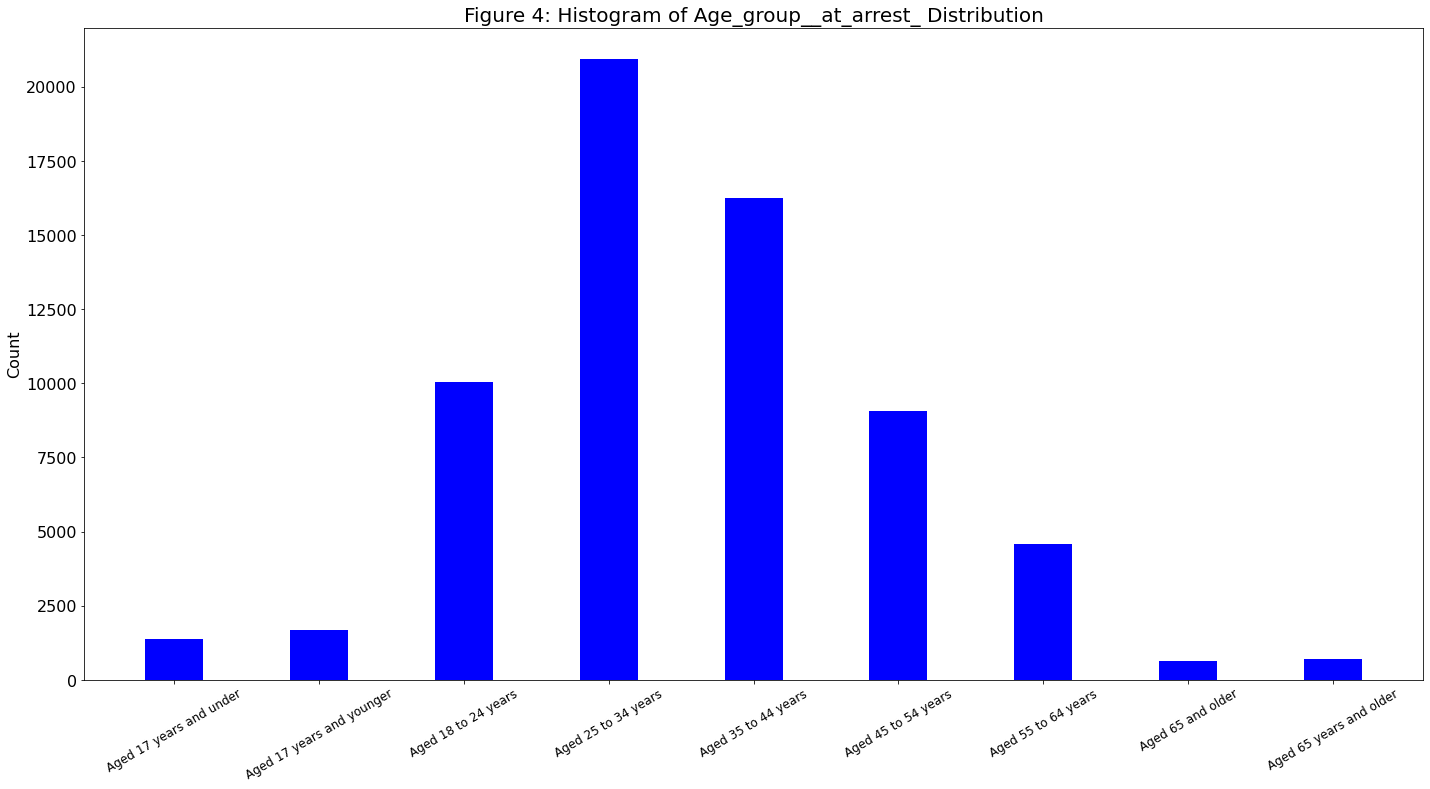

In [9]:
age_data = eda_data.groupby(['Age_group__at_arrest_'],as_index=False).size()
age_data.dropna()
age_data.rename(columns = {'size':'count'},inplace = True)
fig = plt.figure(figsize = (24,12))
plt.bar(age_data['Age_group__at_arrest_'], height = age_data['count'],color ='blue',width = 0.4)
plt.ylabel("Count",size=16)
plt.xticks(size=12,rotation = 30)
plt.yticks(size=16)
plt.title("Figure 4: Histogram of Age_group__at_arrest_ Distribution", size = 20)
plt.show()

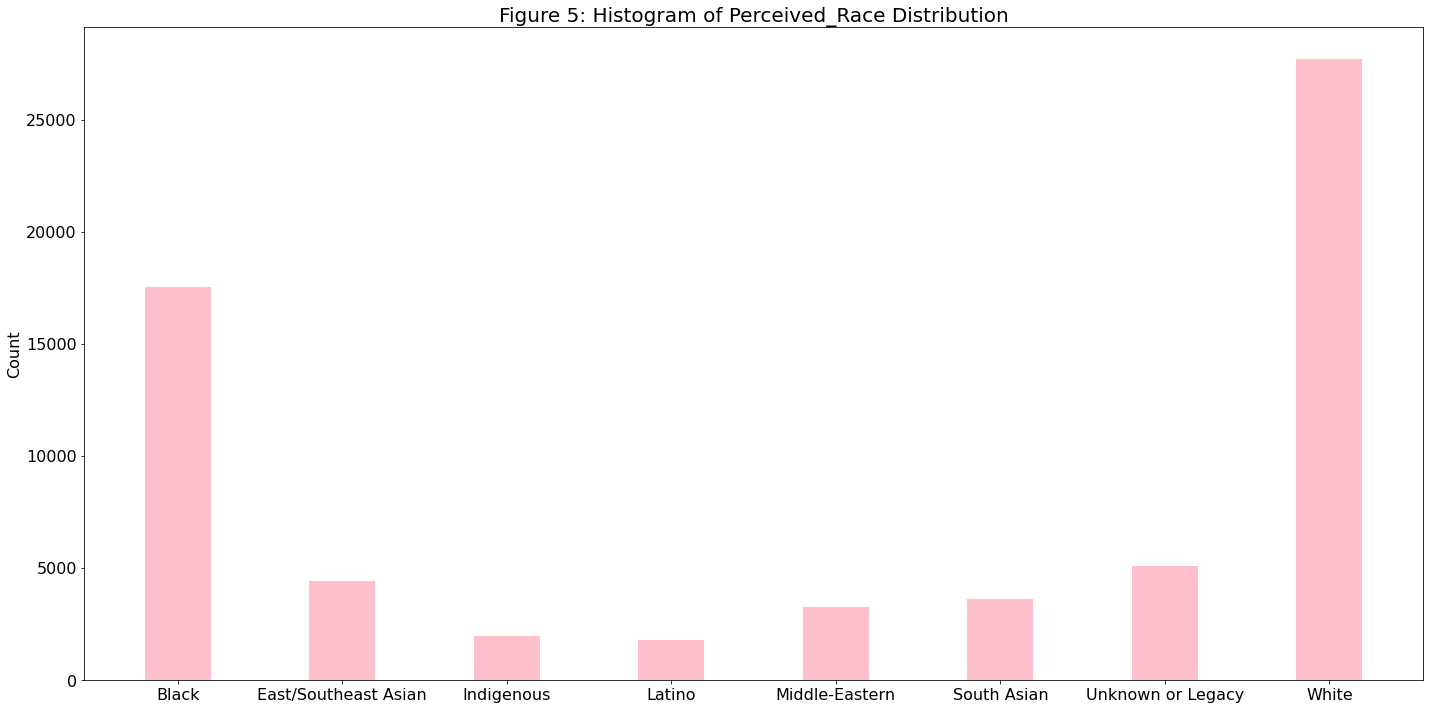

In [10]:
race_data = eda_data.groupby(['Perceived_Race'],as_index=False).size()
race_data.dropna()
race_data.rename(columns = {'size':'count'},inplace = True)
fig = plt.figure(figsize = (24,12))
plt.bar(race_data['Perceived_Race'], height = race_data['count'],color ='pink',width = 0.4)
plt.ylabel("Count",size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title("Figure 5: Histogram of Perceived_Race Distribution", size = 20)
plt.show()

Data Selection

In [16]:
def selectdata(filename):
  data = pd.read_csv(filename)
  new_data = data[['Arrest_Year','Arrest_Month','Perceived_Race','Sex','Youth_at_arrest__under_18_years','Age_group__at_arrest_','Booked','StripSearch']]
  new_data[['Arrest_Month','Perceived_Race','Sex','Youth_at_arrest__under_18_years','Age_group__at_arrest_']]=new_data[['Arrest_Month','Perceived_Race','Sex','Youth_at_arrest__under_18_years','Age_group__at_arrest_']].astype('string')
  new_data = (new_data[new_data['Sex'].str.contains('U') == False])
  new_data.loc[new_data.Age_group__at_arrest_ == 'Aged 65 and older','Age_group__at_arrest_'] = 'Aged 65 years and older'
  new_data.loc[new_data.Age_group__at_arrest_ == 'Aged 17 years and younger','Age_group__at_arrest_'] = 'Aged 17 years and under'
  new_data.loc[new_data.Youth_at_arrest__under_18_years == 'Youth (aged 17 and younger)','Youth_at_arrest__under_18_years'] = 'Youth (aged 17 years and under)'
  new_data = new_data.dropna()
  return new_data

In [17]:
data = selectdata('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
data

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Booked,StripSearch
0,2020,July-Sept,White,M,Not a youth,Aged 35 to 44 years,1,0
1,2020,July-Sept,White,M,Not a youth,Aged 35 to 44 years,1,0
2,2020,Oct-Dec,Unknown or Legacy,M,Not a youth,Aged 35 to 44 years,1,0
3,2021,Jan-Mar,Black,M,Not a youth,Aged 25 to 34 years,0,0
4,2021,Jan-Mar,South Asian,M,Not a youth,Aged 25 to 34 years,1,0
...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,Indigenous,F,Not a youth,Aged 25 to 34 years,0,0
65272,2021,Oct-Dec,South Asian,M,Not a youth,Aged 35 to 44 years,1,0
65273,2021,Oct-Dec,White,F,Not a youth,Aged 45 to 54 years,0,0
65274,2021,Oct-Dec,Unknown or Legacy,M,Youth (aged 17 years and under),Aged 17 years and under,0,0


Data Preprocessing

In [18]:
def data_preprocess(data):
  data['Perceived_Race_num'] = pd.factorize(data['Perceived_Race'])[0]
  data['Sex_num'] = pd.factorize(data['Sex'])[0]
  data['Age_group_num'] = 0
  data.loc[data.Age_group__at_arrest_ == 'Aged 18 to 24 years','Age_group_num'] = 1
  data.loc[data.Age_group__at_arrest_ == 'Aged 25 to 34 years','Age_group_num'] = 2
  data.loc[data.Age_group__at_arrest_ == 'Aged 35 to 44 years','Age_group_num'] = 3
  data.loc[data.Age_group__at_arrest_ == 'Aged 45 to 54 years','Age_group_num'] = 4
  data.loc[data.Age_group__at_arrest_ == 'Aged 55 to 64 years','Age_group_num'] = 5
  data.loc[data.Age_group__at_arrest_ == 'Aged 65 years and older','Age_group_num'] = 6
  return data

In [19]:
data = data_preprocess(data)
data

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Booked,StripSearch,Perceived_Race_num,Sex_num,Age_group_num
0,2020,July-Sept,White,M,Not a youth,Aged 35 to 44 years,1,0,0,0,3
1,2020,July-Sept,White,M,Not a youth,Aged 35 to 44 years,1,0,0,0,3
2,2020,Oct-Dec,Unknown or Legacy,M,Not a youth,Aged 35 to 44 years,1,0,1,0,3
3,2021,Jan-Mar,Black,M,Not a youth,Aged 25 to 34 years,0,0,2,0,2
4,2021,Jan-Mar,South Asian,M,Not a youth,Aged 25 to 34 years,1,0,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,Indigenous,F,Not a youth,Aged 25 to 34 years,0,0,4,1,2
65272,2021,Oct-Dec,South Asian,M,Not a youth,Aged 35 to 44 years,1,0,3,0,3
65273,2021,Oct-Dec,White,F,Not a youth,Aged 45 to 54 years,0,0,0,1,4
65274,2021,Oct-Dec,Unknown or Legacy,M,Youth (aged 17 years and under),Aged 17 years and under,0,0,1,0,0


R1: Booked vs race+sex

t-test

In [20]:
Booked_data = data[data['Booked']==1].groupby(data.columns.tolist(),as_index=False).size()
Booked_data.rename(columns = {'size':'Booked_count'},inplace = True)
Booked_data.dropna()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Booked,StripSearch,Perceived_Race_num,Sex_num,Age_group_num,Booked_count
0,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,1,0,2,1,1,14
1,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,1,1,2,1,1,16
2,2020,Apr-June,Black,F,Not a youth,Aged 25 to 34 years,1,0,2,1,2,28
3,2020,Apr-June,Black,F,Not a youth,Aged 25 to 34 years,1,1,2,1,2,12
4,2020,Apr-June,Black,F,Not a youth,Aged 35 to 44 years,1,0,2,1,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2021,Oct-Dec,White,M,Not a youth,Aged 55 to 64 years,1,0,0,0,5,120
1224,2021,Oct-Dec,White,M,Not a youth,Aged 55 to 64 years,1,1,0,0,5,3
1225,2021,Oct-Dec,White,M,Not a youth,Aged 65 years and older,1,0,0,0,6,35
1226,2021,Oct-Dec,White,M,Not a youth,Aged 65 years and older,1,1,0,0,6,1


Text(0.5, 1.0, 'Figure 6: Booked Count Correlation Heatmap')

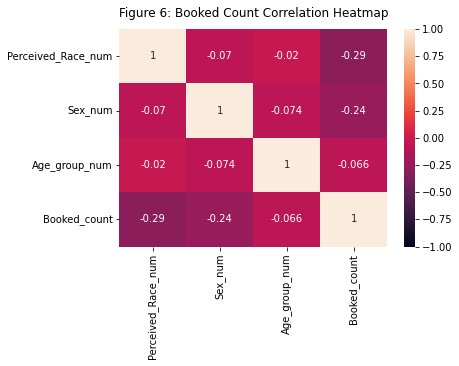

In [21]:
booked_heat = Booked_data[['Perceived_Race_num','Sex_num','Age_group_num','Booked_count']]
heatmap1 = sns.heatmap(booked_heat.corr(),vmin=-1, vmax=1, annot=True)
heatmap1.set_title('Figure 6: Booked Count Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [22]:
F = Booked_data[Booked_data['Sex'] == 'F']['Booked_count']
M = Booked_data[Booked_data['Sex'] == 'M']['Booked_count']
statistic, pvalue = stats.ttest_1samp(M, F.mean())
pvalue

5.67923465780535e-25

In [ ]:
Booked_data

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Booked,StripSearch,Perceived_Race_num,Age_group_num,Booked_count
0,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,1,0,2,1,14
1,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,1,1,2,1,16
2,2020,Apr-June,Black,F,Not a youth,Aged 25 to 34 years,1,0,2,2,28
3,2020,Apr-June,Black,F,Not a youth,Aged 25 to 34 years,1,1,2,2,12
4,2020,Apr-June,Black,F,Not a youth,Aged 35 to 44 years,1,0,2,3,17
...,...,...,...,...,...,...,...,...,...,...,...
1223,2021,Oct-Dec,White,M,Not a youth,Aged 55 to 64 years,1,0,0,5,120
1224,2021,Oct-Dec,White,M,Not a youth,Aged 55 to 64 years,1,1,0,5,3
1225,2021,Oct-Dec,White,M,Not a youth,Aged 65 years and older,1,0,0,6,35
1226,2021,Oct-Dec,White,M,Not a youth,Aged 65 years and older,1,1,0,6,1


In [23]:
table_data = Booked_data[['Perceived_Race','Sex','Booked_count']]
table_mean = table_data.groupby(['Perceived_Race','Sex']).mean()
table_mean

Booked_count
Perceived_Race       Sex              
Black                F       16.617284
                     M       78.528302
East/Southeast Asian F        3.650794
                     M       20.260870
Indigenous           F        5.578947
                     M        9.934211
Latino               F        3.285714
                     M       10.493827
Middle-Eastern       F        2.562500
                     M       16.955056
South Asian          F        3.634615
                     M       18.904762
Unknown or Legacy    F        5.873016
                     M       21.978723
White                F       28.000000
                     M      107.065421

One-way ANOVA: Booked count and race

In [24]:
white = Booked_data[Booked_data['Perceived_Race'] == 'White']['Booked_count']
black = Booked_data[Booked_data['Perceived_Race'] == 'Black']['Booked_count']
es_asian = Booked_data[Booked_data['Perceived_Race'] == 'East/Southeast Asian']['Booked_count']
s_asian = Booked_data[Booked_data['Perceived_Race'] == 'South Asian']['Booked_count']
me = Booked_data[Booked_data['Perceived_Race'] == 'Middle-Eastern']['Booked_count']
ind = Booked_data[Booked_data['Perceived_Race'] == 'Indigenous']['Booked_count']
lat = Booked_data[Booked_data['Perceived_Race'] == 'Latino']['Booked_count']
# One-way ANOVA
statistic, pvalue = f_oneway(white, black, es_asian, s_asian, me, ind, lat)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 34.70671924876866, p = 1.9575461404041676e-38


Tukey test for race and booked count

In [25]:
tukey = pairwise_tukeyhsd(endog=Booked_data['Booked_count'],groups=Booked_data['Perceived_Race'],alpha=0.05)
print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2        meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------
               Black East/Southeast Asian -38.2016  0.001  -55.504 -20.8991   True
               Black           Indigenous -43.6436  0.001 -61.7116 -25.5756   True
               Black               Latino -43.3923  0.001 -62.2181 -24.5665   True
               Black       Middle-Eastern -39.7988  0.001  -57.712 -21.8856   True
               Black          South Asian -38.6451  0.001 -56.5962 -20.6939   True
               Black    Unknown or Legacy -36.1953  0.001 -53.4374 -18.9532   True
               Black                White  17.1583 0.0267    1.088  33.2286   True
East/Southeast Asian           Indigenous   -5.442    0.9 -24.2692  13.3852  False
East/Southeast Asian               Latino  -5.1907    0.9 -24.7463  14.3649  False
East

Two-way ANOVA: One-way ANOVA: Booked count vs race and sex

In [26]:
new_data=Booked_data
new_data[['Perceived_Race','Sex']]=Booked_data[['Perceived_Race','Sex']].astype('object')
new_data[new_data.isnull().T.any()]
model = ols('Booked_count ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=new_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),7.420622e+05,7.0,45.514238,2.074719e-57
C(Sex),3.025305e+05,1.0,129.889540,1.175224e-28
C(Perceived_Race):C(Sex),2.325323e+05,7.0,14.262320,6.770281e-18
Residual,2.822914e+06,1212.0,NaN,NaN


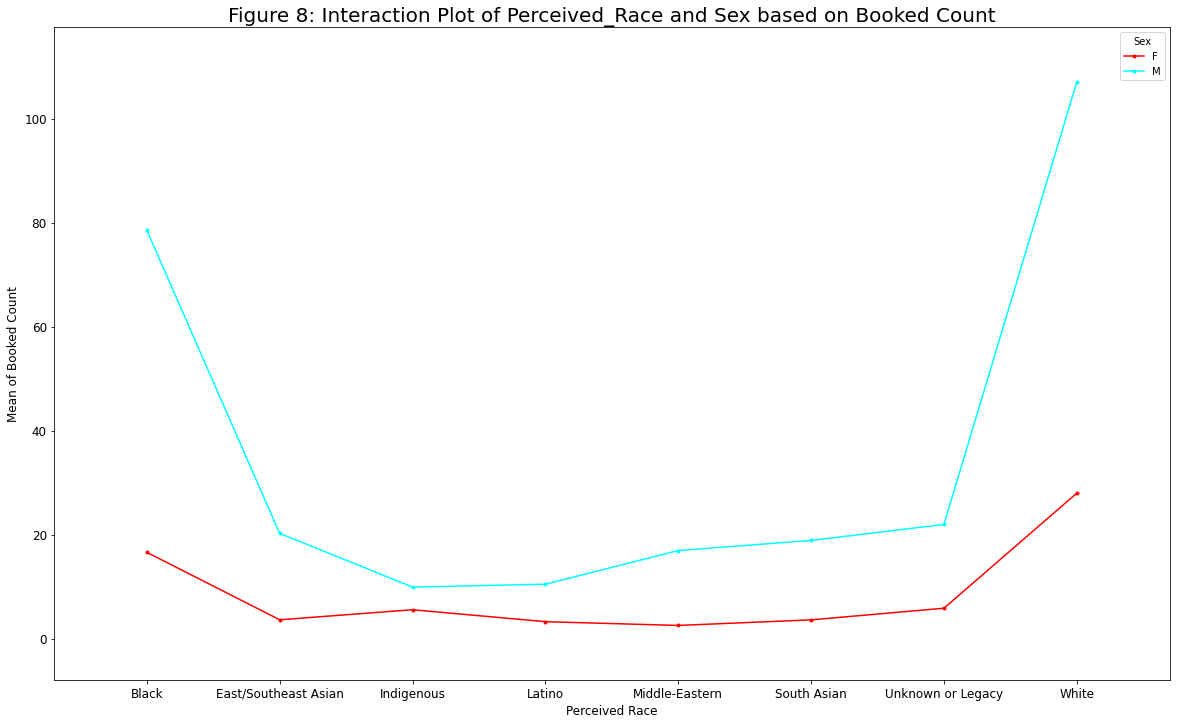

In [27]:
fig, ax = plt.subplots(figsize = (20,12))
fig = interaction_plot(x=new_data['Perceived_Race'], trace=new_data['Sex'], response=new_data['Booked_count'], ax=ax)
plt.title("Figure 8: Interaction Plot of Perceived_Race and Sex based on Booked Count", size=20)
plt.xlabel("Perceived Race",size=12)
plt.ylabel("Mean of Booked Count",size=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

R2: Striped vs race+age

t-test

In [28]:
Strip_data = data[data['StripSearch']==1].groupby(data.columns.tolist(),as_index=False).size()
Strip_data.rename(columns = {'size':'Strip_count'},inplace = True)
Strip_data.dropna()
adult=Strip_data[Strip_data.Youth_at_arrest__under_18_years=='Not a youth']['Strip_count']
youth=Strip_data.loc[Strip_data.Youth_at_arrest__under_18_years=='Youth (aged 17 years and under)']['Strip_count']
statistic, pvalue = stats.ttest_1samp(adult, youth.mean())
pvalue

1.1316728582652387e-08

In [ ]:
Strip_data

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Booked,StripSearch,Perceived_Race_num,Sex_num,Age_group_num,Strip_count
0,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,0,1,2,1,1,1
1,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,1,1,2,1,1,16
2,2020,Apr-June,Black,F,Not a youth,Aged 25 to 34 years,1,1,2,1,2,12
3,2020,Apr-June,Black,F,Not a youth,Aged 35 to 44 years,1,1,2,1,3,6
4,2020,Apr-June,Black,F,Not a youth,Aged 45 to 54 years,1,1,2,1,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
588,2021,Oct-Dec,White,M,Not a youth,Aged 25 to 34 years,1,1,0,0,2,7
589,2021,Oct-Dec,White,M,Not a youth,Aged 35 to 44 years,1,1,0,0,3,17
590,2021,Oct-Dec,White,M,Not a youth,Aged 45 to 54 years,1,1,0,0,4,8
591,2021,Oct-Dec,White,M,Not a youth,Aged 55 to 64 years,1,1,0,0,5,3


Text(0.5, 1.0, 'Figure 7: Strip Count Correlation Heatmap')

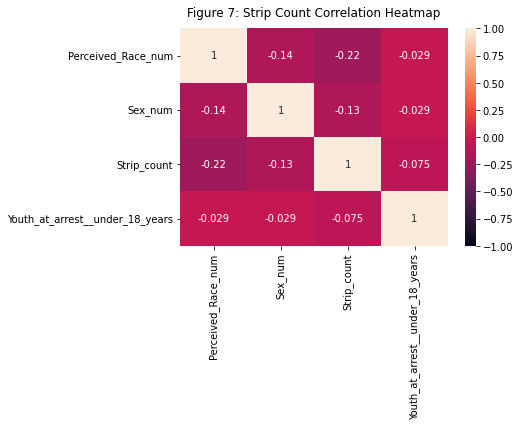

In [29]:
strip_heat = Strip_data[['Perceived_Race_num','Sex_num','Strip_count','Youth_at_arrest__under_18_years']]
strip_heat['Youth_at_arrest__under_18_years'] = pd.factorize(strip_heat['Youth_at_arrest__under_18_years'])[0]
heatmap1 = sns.heatmap(strip_heat.corr(),vmin=-1, vmax=1, annot=True)
heatmap1.set_title('Figure 7: Strip Count Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
table_data2 = Strip_data[['Perceived_Race','Youth_at_arrest__under_18_years','Strip_count']]
table_mean2 = table_data2.groupby(['Perceived_Race','Youth_at_arrest__under_18_years']).mean()
table_mean2

Strip_count
Perceived_Race       Youth_at_arrest__under_18_years             
Black                Not a youth                        24.021053
                     Youth (aged 17 years and under)    11.692308
East/Southeast Asian Not a youth                         6.054545
                     Youth (aged 17 years and under)     2.666667
Indigenous           Not a youth                         4.838710
                     Youth (aged 17 years and under)     1.500000
Latino               Not a youth                         3.236842
                     Youth (aged 17 years and under)     1.800000
Middle-Eastern       Not a youth                         4.280000
                     Youth (aged 17 years and under)     2.800000
South Asian          Not a youth                         5.255319
                     Youth (aged 17 years and under)     2.000000
Unknown or Legacy    Not a youth                         7.253521
                     Youth (aged 17 years and under)     3.500000
White                Not a youth                        28.975207
                     Youth (aged 17 years and under)     4.615385

One-way ANOVA: Strip count and race

In [30]:
white = Strip_data[Strip_data['Perceived_Race'] == 'White']['Strip_count']
black = Strip_data[Strip_data['Perceived_Race'] == 'Black']['Strip_count']
es_asian = Strip_data[Strip_data['Perceived_Race'] == 'East/Southeast Asian']['Strip_count']
s_asian = Strip_data[Strip_data['Perceived_Race'] == 'South Asian']['Strip_count']
me = Strip_data[Strip_data['Perceived_Race'] == 'Middle-Eastern']['Strip_count']
ind = Strip_data[Strip_data['Perceived_Race'] == 'Indigenous']['Strip_count']
lat = Strip_data[Strip_data['Perceived_Race'] == 'Latino']['Strip_count']
# One-way ANOVA
statistic, pvalue = f_oneway(white, black, es_asian, s_asian, me, ind, lat)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 7.487383869159838, p = 1.0556455931388157e-07


Tukey test: Strip count and race

In [ ]:
tukey = pairwise_tukeyhsd(endog=Strip_data['Strip_count'],groups=Strip_data['Perceived_Race'],alpha=0.05)
print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------
               Black East/Southeast Asian -16.6577 0.0356 -32.7084 -0.6071   True
               Black           Indigenous -17.9007 0.0104 -33.3054 -2.4959   True
               Black               Latino -19.4673 0.0206 -37.2462 -1.6883   True
               Black       Middle-Eastern -18.3916 0.0151 -34.7245 -2.0586   True
               Black          South Asian -17.5947 0.0297 -34.2369 -0.9525   True
               Black    Unknown or Legacy  -15.576 0.0291 -30.2819 -0.8701   True
               Black                White   4.0749    0.9   -8.675 16.8248  False
East/Southeast Asian           Indigenous  -1.2429    0.9 -18.9885 16.5026  False
East/Southeast Asian               Latino  -2.8095    0.9 -22.6511  17.032  False
East/Southeast A

One-way ANOVA: Strip count and Age group

In [ ]:
age0 = Strip_data[Strip_data['Age_group_num'] == 0]['Strip_count']
age1 = Strip_data[Strip_data['Age_group_num'] == 1]['Strip_count']
age2 = Strip_data[Strip_data['Age_group_num'] == 2]['Strip_count']
age3 = Strip_data[Strip_data['Age_group_num'] == 3]['Strip_count']
age4 = Strip_data[Strip_data['Age_group_num'] == 4]['Strip_count']
age5 = Strip_data[Strip_data['Age_group_num'] == 5]['Strip_count']
age6 = Strip_data[Strip_data['Age_group_num'] == 6]['Strip_count']
# One-way ANOVA
statistic, pvalue = f_oneway(age0, age1, age2, age3, age4, age5, age6)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 3.1564918852786907, p = 0.0046962920905976304


Tukey test: Strip count and age group

In [ ]:
tukey = pairwise_tukeyhsd(endog=Strip_data['Strip_count'],groups=Strip_data['Age_group__at_arrest_'],alpha=0.05)
print(tukey)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------
Aged 17 years and under     Aged 18 to 24 years   7.0785 0.8471  -9.3007 23.4576  False
Aged 17 years and under     Aged 25 to 34 years  15.8072 0.0532  -0.1161 31.7306  False
Aged 17 years and under     Aged 35 to 44 years  12.0033 0.2949  -4.1084  28.115  False
Aged 17 years and under     Aged 45 to 54 years   5.0989    0.9  -11.941 22.1388  False
Aged 17 years and under     Aged 55 to 64 years   0.4711    0.9 -17.7434 18.6855  False
Aged 17 years and under Aged 65 years and older    -3.62    0.9  -28.164 20.9241  False
    Aged 18 to 24 years     Aged 25 to 34 years   8.7288 0.3991   -3.997 21.4546  False
    Aged 18 to 24 years     Aged 35 to 44 years   4.9249    0.9  -8.0358 17.8856  False
    Aged 18 to 24 years     Aged

Two-way ANOVA: Strip count vs race and age group

In [31]:
new_data=Strip_data
new_data[['Perceived_Race','Age_group__at_arrest_']]=Strip_data[['Perceived_Race','Age_group__at_arrest_']].astype('object')
model = ols('Strip_count ~ C(Perceived_Race) + C(Age_group__at_arrest_) + C(Perceived_Race):C(Age_group__at_arrest_)', data=new_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),91549.224879,7.0,12.725180,1.049841e-11
C(Age_group__at_arrest_),37840.034586,6.0,6.136314,7.815658e-05
C(Perceived_Race):C(Age_group__at_arrest_),32257.022272,42.0,0.747278,8.722386e-01
Residual,553963.904724,539.0,NaN,NaN


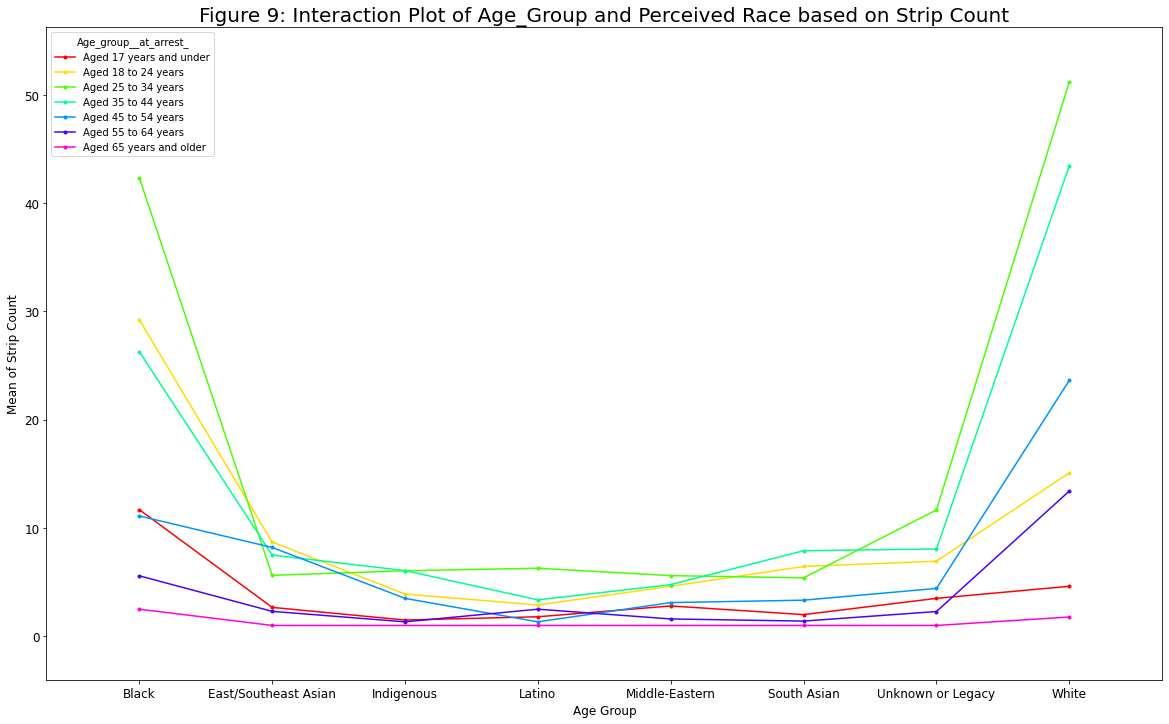

In [32]:
fig, ax = plt.subplots(figsize = (20,12))
fig = interaction_plot(x=new_data['Perceived_Race'], trace=new_data['Age_group__at_arrest_'], response=new_data['Strip_count'], ax=ax)
plt.title("Figure 9: Interaction Plot of Age_Group and Perceived Race based on Strip Count", size=20)
plt.xlabel("Age Group",size=12)
plt.ylabel("Mean of Strip Count",size=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()